In [2]:
import pandas
import numpy
import osgeo.gdal as gdal
import matplotlib.pyplot as plt
import glob
import os.path
%matplotlib inline

In [3]:
imgPath = '/Users/pete/Temp/AustralianMangroves/MangChangePVFC_V2/pvimgs'

tilesOfInterest = [1672]#[970, 971, 972, 1211, 1212, 1213]

inImgs = []

for tile in tilesOfInterest:
    imgs = glob.glob(os.path.join(imgPath, '*_'+str(tile)+'.kea'))
    inImgs.extend(imgs)

inImgs


['/Users/pete/Temp/AustralianMangroves/MangChangePVFC_V2/pvimgs/PV2GMW_MangExtent_2535_11385_1672.kea']

In [4]:
startYear = 1987
endYear = 2016
years = numpy.arange(startYear, endYear+1, 1)


In [5]:
pxlCount = 0
for img in inImgs:
    dataset = gdal.Open(img, gdal.GA_ReadOnly)
    if not dataset:
        raise Exception("Could not open image: " + img)
    else:
        pxlCount = pxlCount + (dataset.RasterXSize * dataset.RasterYSize)
        if len(years) != dataset.RasterCount:
            raise Exception("Number of bands is not equal to the number of years")
        dataset = None


In [6]:
yearArrDict = dict()
for year in years:
    yearArrDict[year] = numpy.zeros(pxlCount)

imgPxlIdx = 0
for img in inImgs:
    dataset = gdal.Open(img, gdal.GA_ReadOnly)
    if not dataset:
        raise Exception("Could not open image: " + img)
    numPxl = dataset.RasterXSize * dataset.RasterYSize
    for bandIdx in range(dataset.RasterCount):
        band = dataset.GetRasterBand(bandIdx+1)
        #arrBand = band.ReadAsArray().flatten()
        yearArrDict[years[bandIdx]][imgPxlIdx:imgPxlIdx+numPxl] = band.ReadAsArray().flatten()
    imgPxlIdx = imgPxlIdx + numPxl

for year in yearArrDict:
    yearArrDict[year] = yearArrDict[year][yearArrDict[year] != 255]


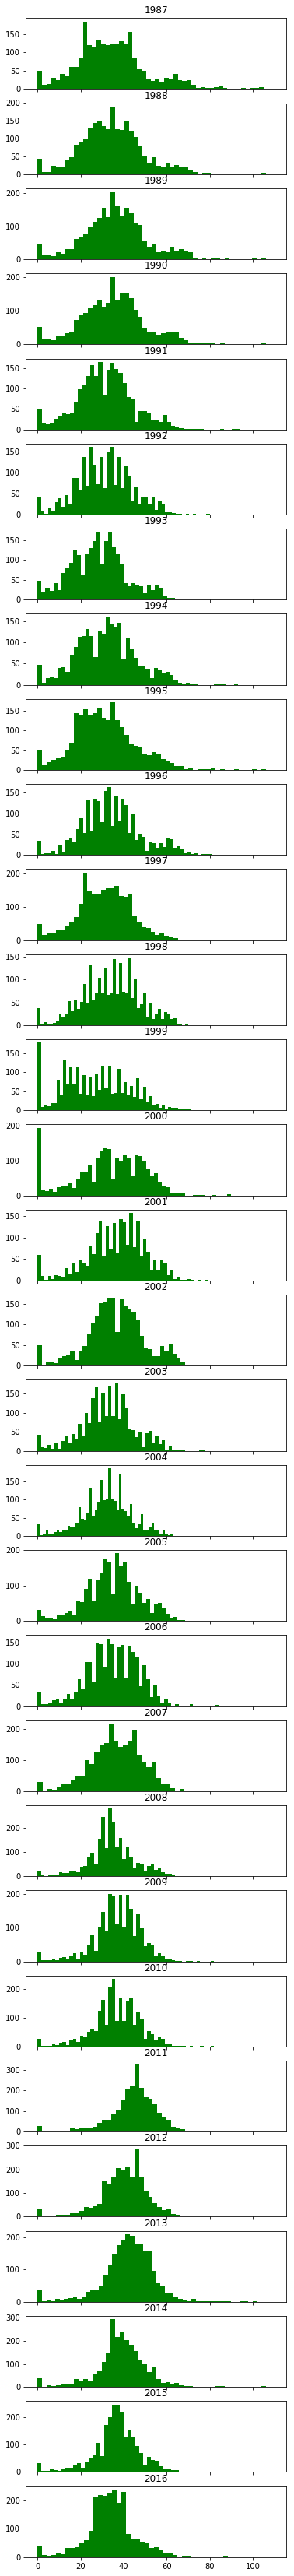

In [8]:
f, axarr = plt.subplots(len(years), sharex=True)

f.set_figheight(60)

idx = 0
for year in years:
    axarr[idx].hist(yearArrDict[year], 50, facecolor='green')#, alpha=0.75)normed=1
    #axarr[idx].axis([0, 100, 0, 0.05])
    axarr[idx].set_title(str(year))
    idx = idx + 1
